# Analysis
- Generates ROC-AUC curves for 0714_pred.csv.

In [ ]:
import pandas as pd
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as pyplot


In [82]:
data_fld = '../data'
sub_fld = os.path.join(data_fld, 'TCGA_data')
path = os.path.join(sub_fld, '0714_pred.csv')
df = pd.read_csv(path, index_col=0)
df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'], inplace = True)

In [83]:
df = df[['wsi_id','x_tile_coord','y_tile_coord','clinical_donor_id','wsi_name','clinical_sample_id','primary_tumor_type','CNA_data','ABSOLUTE_purity','rna_subtype','BetaCAT','P53','PTEN','APC', 'pred_prob']]
df

,wsi_id,x_tile_coord,y_tile_coord,clinical_donor_id,wsi_name,clinical_sample_id,primary_tumor_type,CNA_data,ABSOLUTE_purity,rna_subtype,BetaCAT,P53,PTEN,APC,pred_prob
0,TCGA-EE-A3JD-01Z-00-DX1.svs,1,8,TCGA-EE-A3JD,TCGA-EE-A3JD-01Z-00-DX1.D4E5B644-C7EF-442D-91F...,TCGA-EE-A3JD-06,NON-ACRAL CUTANEOUS,True,0.26,MITF-Low,0,1,0,0,[0.1882925 0.4552523 0.1513648 0.20509037]
1,TCGA-D3-A3CB-06Z-00-DX1.svs,0,5,TCGA-D3-A3CB,TCGA-D3-A3CB-06Z-00-DX1.9862D604-C9E7-44BE-99E...,TCGA-D3-A3CB-06,NON-ACRAL CUTANEOUS,True,0.37,Common,0,0,0,0,[0.1609401 0.0134259 0.79342 0.03221402]
2,TCGA-EE-A2MK-01Z-00-DX1.svs,8,6,TCGA-EE-A2MK,TCGA-EE-A2MK-01Z-00-DX1.3A8F8407-BA89-46E6-959...,TCGA-EE-A2MK-06,NON-ACRAL CUTANEOUS,True,0.76,Common,0,0,0,0,[0.13659349 0.0171255 0.8145897 0.03169137]
3,TCGA-ER-A2NF-01Z-00-DX1.svs,4,9,TCGA-ER-A2NF,TCGA-ER-A2NF-01Z-00-DX1.1468DD2D-6AC8-4657-A02...,TCGA-ER-A2NF-01,NON-ACRAL CUTANEOUS,True,0.58,Common,0,0,0,0,[0.25537488 0.36426172 0.20531116 0.17505227]
4,TCGA-EE-A2MI-01Z-00-DX1.svs,9,6,TCGA-EE-A2MI,TCGA-EE-A2MI-01Z-00-DX1.1C56D0A7-3FA7-49A6-BBC...,TCGA-EE-A2MI-06,NON-ACRAL CUTANEOUS,True,0.66,MITF-Low,0,0,0,0,[0.15836923 0.5427703 0.08012361 0.21873692]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19916,TCGA-D3-A2J9-06Z-00-DX1.svs,1,5,TCGA-D3-A2J9,TCGA-D3-A2J9-06Z-00-DX1.5526CFD6-96AB-49F8-B88...,TCGA-D3-A2J9-06,NON-ACRAL CUTANEOUS,True,0.59,Common,0,0,0,0,[3.4304243e-02 9.0391201e-05 9.6430260e-01 1.3...
19917,TCGA-BF-A5EO-01Z-00-DX1.svs,13,7,TCGA-BF-A5EO,TCGA-BF-A5EO-01Z-00-DX1.1BA74189-485E-4ABF-831...,TCGA-BF-A5EO-01,NON-ACRAL CUTANEOUS,True,0.61,OxPhos,0,0,0,0,[0.44559675 0.27826768 0.14540793 0.13072768]
19918,TCGA-EE-A20C-01Z-00-DX1.svs,7,3,TCGA-EE-A20C,TCGA-EE-A20C-01Z-00-DX1.48BAD79E-DFC8-44A7-92F...,TCGA-EE-A20C-06,NON-ACRAL CUTANEOUS,True,0.89,Common,0,0,0,0,[9.9757862e-01 2.3144986e-03 8.9853147e-09 1.0...
19919,TCGA-ER-A2NG-01Z-00-DX1.svs,2,4,TCGA-ER-A2NG,TCGA-ER-A2NG-01Z-00-DX1.35B12E55-502A-4B87-A68...,TCGA-ER-A2NG-06,NON-ACRAL CUTANEOUS,True,0.49,Common,0,0,0,0,[0.02046566 0.41718772 0.0133557 0.5489909 ]


In [84]:
LABELS = ['Common', 'MITF-Low', 'OxPhos', 'Other']
test_images = []
for i in LABELS:
    test_images.extend(os.listdir('/home/sparkar/disks/2021_7_9_set/test/' + i))

In [85]:
LABELS = ['Other']
for i in LABELS:
    test_images.extend(os.listdir('/home/sparkar/disks/2021_7_9_set/validation/' + i))

In [86]:
test_images = [str(i.split('_')[0]) + '.svs' for i in test_images]

In [87]:
df_test = df[df['wsi_id'].isin(test_images)]

In [89]:
'Process prediction output to legible format'
import re
def parse_str(string, ix):
    n_pt = '([\.0-9\+e\-]+)'
    pattern = '\['+n_pt+'\s+'+n_pt+'\s+'+n_pt+'\s+'+n_pt
    m = re.match(pattern, string)
    if m is None:
        print('error', string)
        
    Common_pb, MITFLow_pb, OxPhos_pb, Other_pb = m.groups()
    Common_pb = float(Common_pb)
    MITFLow_pb = float(MITFLow_pb)
    OxPhos_pb = float(OxPhos_pb)
    Other_pb = float(Other_pb) 

    all_pbs = [Common_pb, MITFLow_pb, OxPhos_pb, Other_pb]
    return all_pbs[ix]

Common_pb = lambda x: parse_str(x, 0)
MITFLow_pb = lambda x: parse_str(x, 1)
OxPhos_pb = lambda x: parse_str(x, 2)
Other_pb = lambda x: parse_str(x, 3)


In [90]:
'Compute prediction probabilities for each class'
df_test['Common'] = df_test.pred_prob.map(Common_pb)
df_test['MITF-Low'] = df_test.pred_prob.map(MITFLow_pb)
df_test['OxPhos'] = df_test.pred_prob.map(OxPhos_pb)
df_test['Other'] = df_test.pred_prob.map(Other_pb)

/tmp/ipykernel_11764/2470721432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Common'] = df_test.pred_prob.map(Common_pb)
/tmp/ipykernel_11764/2470721432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MITF-Low'] = df_test.pred_prob.map(MITFLow_pb)
/tmp/ipykernel_11764/2470721432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [92]:
df_test['Common'] + df_test['MITF-Low'] + df_test['OxPhos'] + df_test['Other']

0        1.0
1        1.0
2        1.0
3        1.0
5        1.0
        ... 
19915    1.0
19916    1.0
19917    1.0
19919    1.0
19920    1.0
Length: 16035, dtype: float64

In [93]:
df_test['Common/MITF-Low'] = df_test['Common'] + df_test['MITF-Low']

/tmp/ipykernel_11764/1393248075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Common/MITF-Low'] = df_test['Common'] + df_test['MITF-Low']


In [95]:
'Assing most likely prediction to each tile'
classes = ['Common/MITF-Low','OxPhos','Other']
preds = np.argmax(df_test[classes].values, axis=1)
ix2cl = {ix: cl for ix, cl in enumerate(classes)}
df_test['prediction'] = [ix2cl[p] for p in preds]

/tmp/ipykernel_11764/3689911324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prediction'] = [ix2cl[p] for p in preds]


/tmp/ipykernel_11764/4054667225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['tile_entropy'] = entropy(df_test[classes], axis=1, base=6)


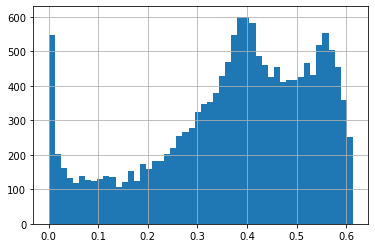

In [96]:
'Compute entropy'
df_test['tile_entropy'] = entropy(df_test[classes], axis=1, base=6)
df_test.tile_entropy.hist(bins=50);

In [60]:
# 'Assign uncertain predictions'
# mask = df_test.tile_entropy > .3
# df_test.loc[mask, 'prediction'] = 'Uncertain'
# (df_test.prediction == 'Uncertain').sum()

/home/sparkar/miniconda3/envs/dev_pytorch/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


11527

In [61]:
#(df_test.prediction == 'Uncertain').sum() / len(df_test)

0.7188649828500155

In [97]:
g = df_test.groupby(['wsi_id'])
df_g = g.count()
n_tiles = df_g['prediction'].values

In [98]:
g = df_test.groupby(['wsi_id', 'prediction'])
df_g = g.count()
df_g

x_tile_coord  y_tile_coord  \
wsi_id                      prediction                                    
TCGA-3N-A9WC-01Z-00-DX1.svs Common/MITF-Low            22            22   
                            Other                      65            65   
TCGA-3N-A9WD-01Z-00-DX1.svs Common/MITF-Low            36            36   
                            OxPhos                      2             2   
TCGA-BF-A1PV-01Z-00-DX1.svs Common/MITF-Low            19            19   
...                                                   ...           ...   
TCGA-Z2-AA3S-01Z-00-DX1.svs Other                       1             1   
                            OxPhos                     11            11   
TCGA-Z2-AA3V-01Z-00-DX1.svs Common/MITF-Low             2             2   
                            Other                       1             1   
                            OxPhos                     13            13   

                                             clinical_donor_id  wsi_name  \
wsi_id                      prediction                                     
TCGA-3N-A9WC-01Z-00-DX1.svs Common/MITF-Low                 22        22   
                            Other                           65        65   
TCGA-3N-A9WD-01Z-00-DX1.svs Common/MITF-Low                 36        36   
                            OxPhos                           2         2   
TCGA-BF-A1PV-01Z-00-DX1.svs Common/MITF-Low                 19        19   
...                                                        ...       ...   
TCGA-Z2-AA3S-01Z-00-DX1.svs Other                            1         1   
                            OxPhos                          11        11   
TCGA-Z2-AA3V-01Z-00-DX1.svs Common/MITF-Low                  2         2   
                            Other                            1         1   
                            OxPhos                          13        13   

                                             clinical_sample_id  \
wsi_id                      prediction                            
TCGA-3N-A9WC-01Z-00-DX1.svs Common/MITF-Low                  22   
                            Other                            65   
TCGA-3N-A9WD-01Z-00-DX1.svs Common/MITF-Low                  36   
                            OxPhos                            2   
TCGA-BF-A1PV-01Z-00-DX1.svs Common/MITF-Low                  19   
...                                                         ...   
TCGA-Z2-AA3S-01Z-00-DX1.svs Other                             1   
                            OxPhos                           11   
TCGA-Z2-AA3V-01Z-00-DX1.svs Common/MITF-Low                   2   
                            Other                             1   
                            OxPhos                           13   

                                             primary_tumor_type  CNA_data  \
wsi_id                      prediction                                      
TCGA-3N-A9WC-01Z-00-DX1.svs Common/MITF-Low                  22        22   
                            Other                            65        65   
TCGA-3N-A9WD-01Z-00-DX1.svs Common/MITF-Low                  36        36   
                            OxPhos                            2         2   
TCGA-BF-A1PV-01Z-00-DX1.svs Common/MITF-Low                  19        19   
...                                                         ...       ...   
TCGA-Z2-AA3S-01Z-00-DX1.svs Other                             1         1   
                            OxPhos                           11        11   
TCGA-Z2-AA3V-01Z-00-DX1.svs Common/MITF-Low                   2         2   
                            Other                             1         1   
                            OxPhos                           13        13   

                                             ABSOLUTE_purity  rna_subtype  \
wsi_id                      prediction                                      
TCGA-3N-A9WC-01Z-00-DX1.svs Common/MITF-Low         

In [102]:
df_g = df_g.reset_index()
res = df_g.pivot_table(index=['wsi_id'], columns='prediction',
                     values='pred_prob', aggfunc='first').reset_index()

res = res.fillna(0)
res

prediction,wsi_id,Common/MITF-Low,Other,OxPhos
0,TCGA-3N-A9WC-01Z-00-DX1.svs,22.0,65.0,0.0
1,TCGA-3N-A9WD-01Z-00-DX1.svs,36.0,0.0,2.0
2,TCGA-BF-A1PV-01Z-00-DX1.svs,19.0,0.0,4.0
3,TCGA-BF-A1PZ-01Z-00-DX1.svs,50.0,0.0,0.0
4,TCGA-BF-A3DL-01Z-00-DX1.svs,16.0,0.0,12.0
...,...,...,...,...
328,TCGA-YG-AA3O-01Z-00-DX1.svs,94.0,0.0,12.0
329,TCGA-YG-AA3P-01Z-00-DX1.svs,77.0,0.0,13.0
330,TCGA-Z2-A8RT-01Z-00-DX1.svs,21.0,0.0,0.0
331,TCGA-Z2-AA3S-01Z-00-DX1.svs,12.0,1.0,11.0


In [103]:
res['Common/MITF-Low'] = res['Common/MITF-Low']/ n_tiles
res['OxPhos'] = res['OxPhos']/ n_tiles
res['Other'] = res['Other']/ n_tiles
res

prediction,wsi_id,Common/MITF-Low,Other,OxPhos
0,TCGA-3N-A9WC-01Z-00-DX1.svs,0.252874,0.747126,0.000000
1,TCGA-3N-A9WD-01Z-00-DX1.svs,0.947368,0.000000,0.052632
2,TCGA-BF-A1PV-01Z-00-DX1.svs,0.826087,0.000000,0.173913
3,TCGA-BF-A1PZ-01Z-00-DX1.svs,1.000000,0.000000,0.000000
4,TCGA-BF-A3DL-01Z-00-DX1.svs,0.571429,0.000000,0.428571
...,...,...,...,...
328,TCGA-YG-AA3O-01Z-00-DX1.svs,0.886792,0.000000,0.113208
329,TCGA-YG-AA3P-01Z-00-DX1.svs,0.855556,0.000000,0.144444
330,TCGA-Z2-A8RT-01Z-00-DX1.svs,1.000000,0.000000,0.000000
331,TCGA-Z2-AA3S-01Z-00-DX1.svs,0.500000,0.041667,0.458333


In [105]:
df_wsi_names = df_test[['wsi_id', 'rna_subtype']].drop_duplicates()

In [106]:
df_test = res.merge(df_wsi_names, how = 'left', on = 'wsi_id')

In [109]:
cm_mask = df_test.rna_subtype == 'Common'
mi_mask = df_test.rna_subtype == 'MITF-Low'
ox_mask = df_test.rna_subtype == 'OxPhos'
ot_mask = df_test.rna_subtype == 'Other'

In [111]:
df_test['Common_type'] = cm_mask
df_test['MITFLow_type'] = mi_mask
df_test['OxPhos_type'] = ox_mask
df_test['Other_type'] = ot_mask
df_test['CM_type'] = cm_mask | mi_mask

In [112]:
df_test['Common/MITF-Low'] + df_test['OxPhos'] + df_test['Other']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
328    1.0
329    1.0
330    1.0
331    1.0
332    1.0
Length: 333, dtype: float64

In [113]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

classes = ['Common/MITF-Low','OxPhos','Other']
class_types = ['CM_type','OxPhos_type','Other_type']

for i,j in zip(classes, class_types):    
    fpr[i], tpr[i], thresh[i] = roc_curve(df_test[j], df_test[i])

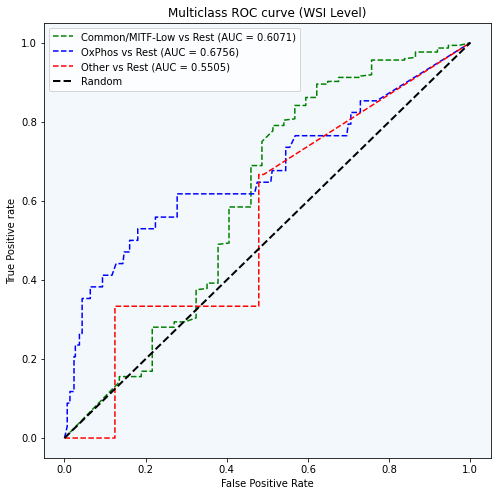

In [114]:
from matplotlib.pyplot import figure

plt.figure(figsize=(8,8))
ax = plt.axes()
ax.set_facecolor("#f2f8fb")

plt.plot(fpr['Common/MITF-Low'], tpr['Common/MITF-Low'], linestyle='--',color='green', label='Common/MITF-Low vs Rest (AUC = 0.6071)')
plt.plot(fpr['OxPhos'], tpr['OxPhos'], linestyle='--',color='blue', label='OxPhos vs Rest (AUC = 0.6756)')
plt.plot(fpr['Other'], tpr['Other'], linestyle='--',color='red', label='Other vs Rest (AUC = 0.5505)')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label = 'Random')
plt.title('Multiclass ROC curve (WSI Level)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('../results/Multiclass_ROC_WSI_Level.pdf',dpi=200);  

In [115]:
print(metrics.auc(fpr['Common/MITF-Low'], tpr['Common/MITF-Low']))
print(metrics.auc(fpr['OxPhos'], tpr['OxPhos']))
print(metrics.auc(fpr['Other'], tpr['Other']))

0.6071950328707084
0.6756344678339563
0.5505050505050504
